<a href="https://colab.research.google.com/github/mananmehtagit/ipynb_notebooks/blob/main/Delaney_solubility_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First Machine Learning Model
loading these data directly from an external source (i.e. such as from a CSV file) but instead are importing the data directly from a Python library such as the datasets sub-module of scikit-learn.   

Import data: https://github.com/dataprofessor/data/raw/master/delaney_solubility_with_descriptors.csv

In [11]:
# prompt: create new code block import sklearn dataset

from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()

# Access the data and target variables
X = iris.data
y = iris.target


To be usable for any data science project, data contents from CSV files can be read into the Python environment using the Pandas library.

In [12]:
import pandas as pd
df = pd.read_csv('https://github.com/dataprofessor/data/raw/master/delaney_solubility_with_descriptors.csv')
print(df)

      MolLogP    MolWt  NumRotatableBonds  AromaticProportion   logS
0     2.59540  167.850                0.0            0.000000 -2.180
1     2.37650  133.405                0.0            0.000000 -2.000
2     2.59380  167.850                1.0            0.000000 -1.740
3     2.02890  133.405                1.0            0.000000 -1.480
4     2.91890  187.375                1.0            0.000000 -3.040
...       ...      ...                ...                 ...    ...
1139  1.98820  287.343                8.0            0.000000  1.144
1140  3.42130  286.114                2.0            0.333333 -4.925
1141  3.60960  308.333                4.0            0.695652 -3.893
1142  2.56214  354.815                3.0            0.521739 -3.790
1143  2.02164  179.219                1.0            0.461538 -2.581

[1144 rows x 5 columns]


Data Processing
data as a dataframe in the df variable, we will now need to prepare it to be in a suitable format to be used by the scikit-learn

Need to separate them into 2 variables X and y.
The first 4 columns except for the last column will be assigned to the X variable while the last column will be assigned to the y variable.

Assigning variable to y

To assign the last column to the y variable, we simple select the last column and assign it to the y variable as follows:

In [16]:
x = df.drop(['logS'], axis=1)

y = df.iloc[:,-1]

y = df['logS']
#y = df.logs
print(x)
print("------")
print(y)

      MolLogP    MolWt  NumRotatableBonds  AromaticProportion
0     2.59540  167.850                0.0            0.000000
1     2.37650  133.405                0.0            0.000000
2     2.59380  167.850                1.0            0.000000
3     2.02890  133.405                1.0            0.000000
4     2.91890  187.375                1.0            0.000000
...       ...      ...                ...                 ...
1139  1.98820  287.343                8.0            0.000000
1140  3.42130  286.114                2.0            0.333333
1141  3.60960  308.333                4.0            0.695652
1142  2.56214  354.815                3.0            0.521739
1143  2.02164  179.219                1.0            0.461538

[1144 rows x 4 columns]
------
0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64


Data splitting
 the data splitting, the scikit-learn library has the train_test_split() function that allows us to do this. An example of using this function to split the dataset into the training set and test set is shown

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model building

Let’s start with the traditional linear regression.

In [18]:
# prompt: import linear regrssion from sklearn

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


# Make predictions on the test data
y_model_train_pred = model.predict(X_train)
y_model_test_pred = model.predict(X_test)

# Evaluate the model's performance (e.g., using metrics like R-squared, Mean Squared Error)
# ... (Code to evaluate the model would go here)

Model Performance

now going to calculate the performance metrics so that we will be able to determine the model performance.

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
model_train_mse = mean_squared_error(y_train, y_model_train_pred)
model_train_r2 = r2_score(y_train, y_model_train_pred)
model_test_mse = mean_squared_error(y_test, y_model_test_pred)
model_test_r2 = r2_score(y_test, y_model_test_pred)

print ("Model Train MSE:", model_train_mse)
print ("Model Train R2:", model_train_r2)
print ("Model Test MSE:", model_test_mse)
print ("Model Test R2:", model_test_r2)

# Print metrics in a table format
lr_results = {
    'Metric': ['MSE (Train)', 'R2 (Train)', 'MSE (Test)', 'R2 (Test)'],
    'Value': [model_train_mse, model_train_r2, model_test_mse, model_test_r2]
}

lr_results = pd.DataFrame(lr_results)
lr_results

Model Train MSE: 1.0139894491573003
Model Train R2: 0.7695127746587307
Model Test MSE: 0.9990844407075306
Model Test R2: 0.7705650058569232


,Metric,Value
0,MSE (Train),1.013989
1,R2 (Train),0.769513
2,MSE (Test),0.999084
3,R2 (Test),0.770565


Random forest

Random forest (RF) is an ensemble learning method whereby it combine the predictions of several decision trees. A great thing about RF is its built-in feature importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train, y_train)

# We’re now going to apply the constructed model to make predictions on the training set and test set as follows
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)


calculate the performance metrics for the constructed random forest model as follows:

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

# consolidate the results, we use the following code
rf_results = pd.DataFrame(['Random forest',rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.050251,0.76127,1.046995,0.759562


Using a regressor (Optional)

Let’s say that we would like to use sklearn.tree.ExtraTreeRegressor we would use as follow

In [25]:
from sklearn.tree import ExtraTreeRegressor
et = ExtraTreeRegressor(random_state=42)
et.fit(X_train, y_train)

ExtraTreeRegressor(random_state=42)

Combining the Results

recall that the model performance metrics that we had previously generated above for linear regression and random forest models are stored in the lr_results and rf_results variables.

As both variables are dataframes, we are going to combine them using the pd.concat() function as shown below:

,Metric,Value,Method,Training MSE,Training R2,Test MSE,Test R2
0,MSE (Train),1.013989,NaN,NaN,NaN,NaN,NaN
1,R2 (Train),0.769513,NaN,NaN,NaN,NaN,NaN
2,MSE (Test),0.999084,NaN,NaN,NaN,NaN,NaN
3,R2 (Test),0.770565,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,Random forest,1.050251,0.76127,1.046995,0.759562


from matplotlib import pyplot as plt
_df_0['Value'].plot(kind='hist', bins=20, title='Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Metric').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Training MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Training R2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Value'].plot(kind='line', figsize=(8, 4), title='Value')
plt.gca().spines[['top', 'right']].set_visible(False)

ValueError: zero-size array to reduction operation fmin which has no identity

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Method'].value_counts()
    for x_label, grp in _df_6.groupby('Metric')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Metric')
_ = plt.ylabel('Method')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training MSE'].value_counts()
    for x_label, grp in _df_7.groupby('Method')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Method')
_ = plt.ylabel('Training MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training R2'].value_counts()
    for x_label, grp in _df_8.groupby('Training MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training MSE')
_ = plt.ylabel('Training R2')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test MSE'].value_counts()
    for x_label, grp in _df_9.groupby('Training R2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training R2')
_ = plt.ylabel('Test MSE')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Value', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



ValueError: cannot reindex on an axis with duplicate labels

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Method'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Value', y='Method', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Training MSE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Value', y='Training MSE', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Training R2'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Value', y='Training R2', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

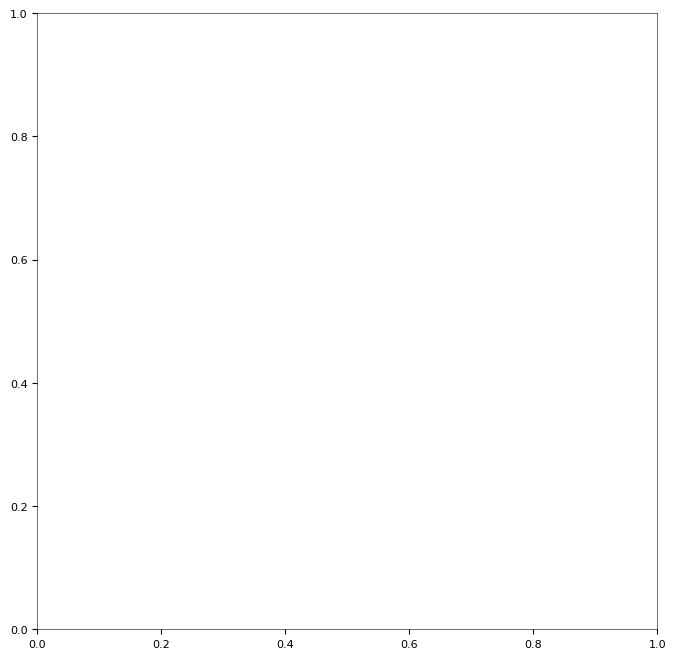

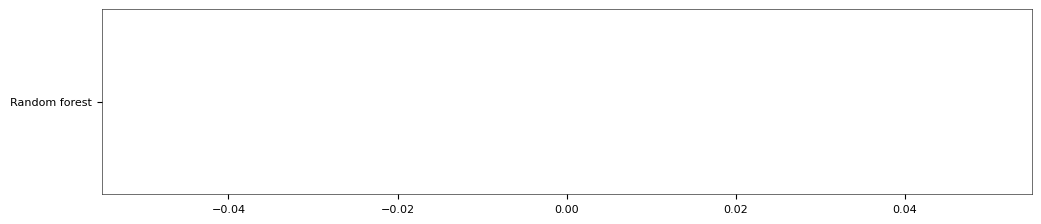

In [30]:
pd.concat([lr_results, rf_results])

Data visualization of prediction results

now visualize the relationship of the actual Y values with their predicted Y values that is the experimental logS versus the predicted logS values.

<function matplotlib.pyplot.show(close=None, block=None)>

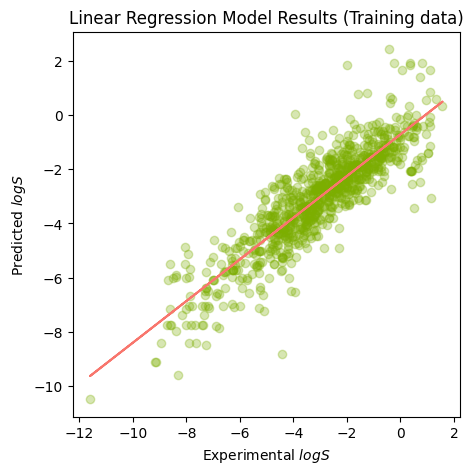

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_model_train_pred, c="#7CAE00", alpha=0.3)
z = np.polyfit(y_train, y_model_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),"#F8766D")
# plt.ylim(0,)
plt.xlabel("Experimental $logS$")
plt.ylabel("Predicted $logS$")
plt.title("Linear Regression Model Results (Training data)")
plt.show